In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import time

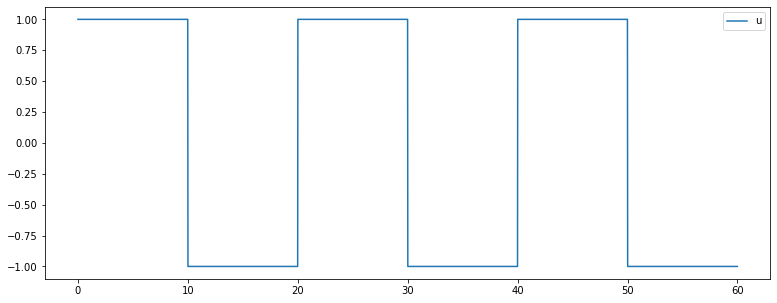

In [2]:
t = np.arange(0,60,0.01)

# smooth input
# u = np.sin(t) + np.cos(t*2)-1

# blocky input
u = signal.square(2 * np.pi *0.05 * t)

# plot the input
plt.figure(figsize=(13,5))
plt.plot(t, u, label = "u")
plt.legend()

### Simulate for output

In [3]:
tua_actual = 0.4
K_actual = 1.5
theta_actual = 1

add_noise = True

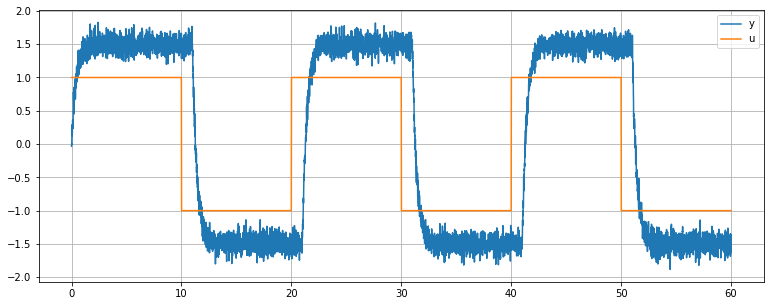

In [4]:
from scipy import signal

# delay the input
u_delay = np.interp(t - theta_actual,t,u)

# add the process noise
if add_noise:
    u_delay += np.random.randn(u_delay.shape[0])*0.01

# pass through first order system
tf = signal.TransferFunction([K_actual], [tua_actual, 1])
T, y, xout = signal.lsim(tf, u_delay, t, X0 =0)

# add the measurement noise
if add_noise:
    y += np.random.randn(y.shape[0])*0.1
    
# plot the output
plt.figure(figsize=(13,5))
plt.plot(t, y, label = "y")
plt.plot(t, u, label = "u")
plt.legend()
plt.grid()
plt.show()

### Preprocessing

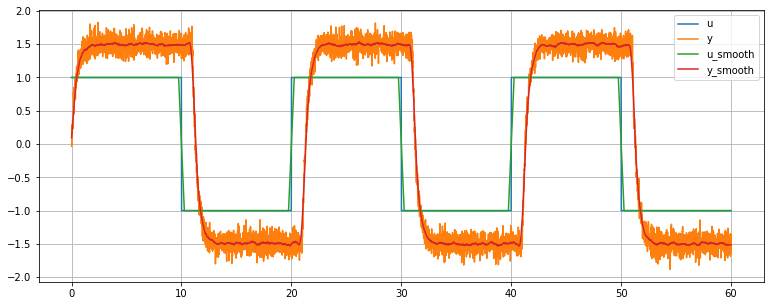

In [5]:
#smooth input u and output y
from scipy import signal
u_smooth = signal.savgol_filter(u, 51, 1)
y_smooth = signal.savgol_filter(y, 51, 1)


plt.figure(figsize=(13,5))
plt.plot(t, u, label = "u")
plt.plot(t, y, label = "y")
plt.plot(t, u_smooth, label = "u_smooth")
plt.plot(t, y_smooth, label = "y_smooth")
plt.legend()
plt.grid()
plt.show()

# u_smooth = u
# y_smooth = y

### Solve system

In [6]:
import FOPDT_fitter

tua_0 = 1
K_0 = 0.5
theta_0 = 0

tua, K, theta = FOPDT_fitter.fit_model(tua_0, K_0, theta_0, u_smooth, y_smooth, t, c=0.5, verbose=True)

Iteration 0: S = 4928.90320, tua = 1.00000, K = 0.50000, theta = 0.00000, alpha = -1.00000
Iteration 1: S = 318.99943, tua = 0.46352, K = 1.30086, theta = 0.75891, alpha = 1.00000
Iteration 2: S = 32.35593, tua = 0.46500, K = 1.48936, theta = 0.96673, alpha = 1.00000
Iteration 3: S = 18.84897, tua = 0.37206, K = 1.49047, theta = 1.01166, alpha = 1.00000
Iteration 4: S = 18.72707, tua = 0.36326, K = 1.48978, theta = 1.01784, alpha = 1.00000
Iteration 5: S = 18.72707, tua = 0.36326, K = 1.48978, theta = 1.01784, alpha = 0.00000

Solution: tua = 0.36326, K = 1.48978, theta = 1.01784
Total time taken: 0.03822 seconds


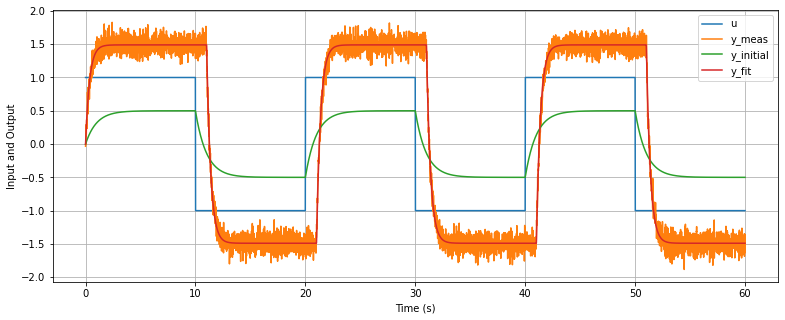

In [7]:
from scipy import signal

# delay the input


# pass through first order system
tf = signal.TransferFunction([K_0], [tua_0, 1])
u_delay = np.interp(t - theta_0,t,u)
T, y_initial, xout = signal.lsim(tf, u_delay, t, X0 =0)
    
# pass through first order system
tf = signal.TransferFunction([K], [tua, 1])
u_delay = np.interp(t - theta,t,u)
T, y_sim, xout = signal.lsim(tf, u_delay, t, X0 =0)

# plot the output
plt.figure(figsize=(13,5))
plt.plot(t, u, label = "u")
plt.plot(t, y, label = "y_meas")
plt.plot(t, y_initial, label = "y_initial")
plt.plot(t, y_sim, label = "y_fit")
plt.grid()
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Input and Output")
plt.show()